# Merging

Files needed = (Metro_MedianRentalPrice_1Bedroom.csv, Metro_MedianRentalPrice_Studio.csv, ml-latest-small.zip)

We will often find ourselves with variables spread across different datasets and files. We *merge* datasets together by matching up the two datasets on one or more variables. For example, I might have GDP data by country from the Penn World Tables, and demographic data by country from the World Bank. We would merge these two datasets and match up the observations by country. 

Some of the most powerful analysis comes from combining data from different sources. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### The data
We are working with data from [Zillow](https://www.zillow.com/research/data/) on rental listing prices. I would like to see how studio and one bedroom prices differ from each other across cities. Unfortunately, Zillow only lets me download one series at a time. (Hey, it's free data, I'm not complaining...) I have downloaded the studio and one bedroom rental listing pricing and now I would like to create one DataFrame with all the data. 

Time to get to work.

In [2]:
# The data come as csv files. Load them into separate DatFrames.
studios = pd.read_csv('Metro_MedianRentalPrice_Studio.csv')
onebeds = pd.read_csv('Metro_MedianRentalPrice_1Bedroom.csv')

In [3]:
# Always check out new data! You never know what could be lurking. 
studios.head(2)
#print(studios.tail())

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,United States,0,1300.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1495.0,1500.0,1495.0,1500.0,1500.0,1520.0,1550.0,1550.0,1550.0,1550.0
1,"New York, NY",1,NaN,2000.0,2000.0,2100.0,2000.0,2125.0,2000.0,1950.0,...,2300.0,2300.0,2300.0,2300.0,2300.0,2350.0,2400.0,2400.0,2400.0,2400.0


In [4]:
onebeds.head(2)
#print(onebeds.tail())

,RegionName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,United States,0,NaN,1200.0,1245.0,1200.0,1250.0,1200.0,1200.0,1044.0,...,1400.0,1400.0,1400.0,1405.0,1425.0,1434.0,1450.0,1450.0,1460.0,1460.0
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2095.0,2050.0,2050.0,2085.0,2100.0,2135.0,2150.0,2192.0,2155.0,2153.0


A few things to note. 
1. There are more regions in the one-bedroom data (there are more rows).
2. Time is listed as columns --- this is **wide** data.

What do we want?
1. One DataFrame with one-bedroom and studio prices
2. A multiIndex of regions and time on the rows
3. Columns of studio and one bedroom prices

In [5]:
# Drop columns we don't need.
studios = studios.drop('SizeRank', axis=1)
onebeds = onebeds.drop('SizeRank', axis=1)

### From wide to long
We could assign indexes and reshape this using `.stack()`. Let's use this as a chance to learn a new command: `.melt()`. `.melt()` is like stack, but does not require the extra steps of creating the multiIndex. It can be a handy function. 

The `melt()` method gets us from a wide DataFrame to a long DataFrame (the [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.melt.html#pandas.DataFrame.melt)). It moves columns into rows.

### melt

To use `.melt()` we need to choose the *id variables* which are the variables to group the observations by. In this case, we want to group by the region name. 

In [6]:
studios_melted = pd.melt(studios, id_vars=['RegionName']) # we spec RegionName as the grouping variable
studios_melted.head(20)

,RegionName,variable,value
0,United States,2010-01,1300.0
1,"New York, NY",2010-01,NaN
2,"Los Angeles, CA",2010-01,NaN
3,"Chicago, IL",2010-01,NaN
4,"Dallas, TX",2010-01,NaN
5,"Philadelphia, PA",2010-01,NaN
6,"Houston, TX",2010-01,NaN
7,"Washington, DC",2010-01,NaN
8,"Miami, FL",2010-01,NaN
9,"Atlanta, GA",2010-01,NaN


### Rename variables

In [7]:
studios_melted.rename(columns={'RegionName':'region', 'variable':'date', 'value':'studio_price'}, inplace=True)
studios_melted.head()

,region,date,studio_price
0,United States,2010-01,1300.0
1,"New York, NY",2010-01,NaN
2,"Los Angeles, CA",2010-01,NaN
3,"Chicago, IL",2010-01,NaN
4,"Dallas, TX",2010-01,NaN


### Repeat for one bedroom data
The studio data looks great. Get the one bedroom data set up.

In [8]:
onebeds_melted = pd.melt(onebeds, ['RegionName'])
onebeds_melted.rename(columns={'RegionName':'region', 'variable':'date', 'value':'onebed_price'}, inplace=True)
onebeds_melted.head()

,region,date,onebed_price
0,United States,2010-02,NaN
1,"New York, NY",2010-02,NaN
2,"Los Angeles, CA",2010-02,NaN
3,"Chicago, IL",2010-02,NaN
4,"Dallas, TX",2010-02,NaN


In [9]:
print(studios_melted.shape)
print(onebeds_melted.shape)

(17368, 3)
(23072, 3)


Notice that studios has many fewer observations. 

### Merge the two DataFrames into one DataFrame
We want to match the two DataFrames together according to the region-date pairs. 
In database-ese, we refer to variables we are matching as **keys.** So, in our case, the keys are region and date. 

We also need to tell pandas how to treat keys that are not present in both databases. The different types of 'join' (more database-ese) are
1. **inner**: keep the intersection of the keys
2. **left**: keep all the keys from the left DataFrame
3. **right**: keep all the keys from right DataFrame
4. **outer**: keep all the keys from both DataFrames

We specify the join type with the `how` parameter. The default is inner, but for sanity's sake, be explicit about your join.

In [10]:
# left and right specify the DataFrames to merge, on specifies the keys (we are using two keys)

rental_prices = pd.merge(left=studios_melted, right=onebeds_melted, on=['region', 'date'], how='inner')
rental_prices

,region,date,studio_price,onebed_price
0,United States,2010-02,1500.0,NaN
1,"New York, NY",2010-02,2000.0,NaN
2,"Los Angeles, CA",2010-02,NaN,NaN
3,"Chicago, IL",2010-02,1500.0,NaN
4,"Dallas, TX",2010-02,NaN,NaN
...,...,...,...,...
12664,"Greencastle, PA",2018-08,1050.0,637.5
12665,"Carbondale, IL",2018-08,689.0,550.0
12666,"Mechanicsville, MD",2018-08,1650.0,1100.0
12667,"Cheyenne, WY",2018-08,1217.5,650.0


Notice that there are 12,669 rows in the merged DataFrame. That is not equal to the number of rows of either of the original DataFrames. These means there are some region-date pairs in each DataFrame that do not exist in the other. 

Go back and try 'left' and 'right' as `how` types. When you are done, change the merge back to 'inner'. 

### Set the index to region and date

In [11]:
rental_prices['date'] = pd.to_datetime(rental_prices['date'])   # set the date column to datetime objects

rental_prices.set_index(['region', 'date'], inplace=True) # set up the index and sort it!
rental_prices.sort_index(axis=0, inplace=True)
rental_prices.head()

studio_price  onebed_price
region      date                                  
Abilene, TX 2010-02-01           NaN           NaN
            2010-03-01           NaN           NaN
            2010-04-01           NaN           NaN
            2010-05-01           NaN           NaN
            2010-06-01           NaN           NaN

Abilene does not have much data. Let's check on the US average.

In [12]:
rental_prices.loc['United States']

,studio_price,onebed_price
date,,
2010-02-01,1500.0,NaN
2010-03-01,1500.0,1200.0
2010-04-01,1500.0,1245.0
2010-05-01,1500.0,1200.0
2010-06-01,1500.0,1250.0
...,...,...
2018-04-01,1520.0,1434.0
2018-05-01,1550.0,1450.0
2018-06-01,1550.0,1450.0


### Try an outer merge
Notice that 2010-01 is missing, even though the studio data have an entry for it (look at the result of the `head()` after we melted the studio data). 

Let's try an outer join.

In [13]:
# The only difference from the previous merge is the switch to 'outer'
rental_prices = pd.merge(left=studios_melted, right=onebeds_melted, on=['region', 'date'], how='outer')

rental_prices['date'] = pd.to_datetime(rental_prices['date'])
rental_prices.set_index(['region', 'date'], inplace=True)
rental_prices.sort_index(axis=0, inplace=True)

rental_prices.loc['United States']

,studio_price,onebed_price
date,,
2010-01-01,1300.0,NaN
2010-02-01,1500.0,NaN
2010-03-01,1500.0,1200.0
2010-04-01,1500.0,1245.0
2010-05-01,1500.0,1200.0
...,...,...
2018-04-01,1520.0,1434.0
2018-05-01,1550.0,1450.0
2018-06-01,1550.0,1450.0


Notice that when we merge as an outer, pandas fills in NaN when there was not an entry in the corresponding DataFrame.

C:\Users\kimru\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


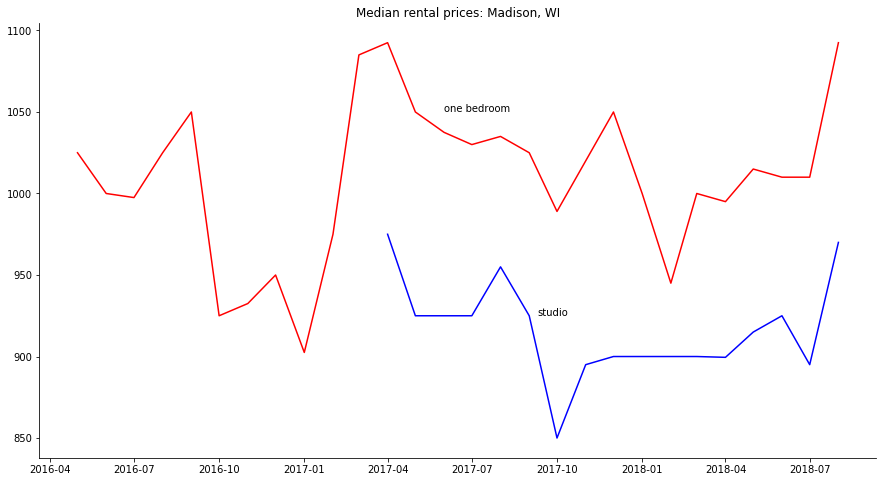

In [14]:
# Peel off the data for Madison
mad = rental_prices.loc['Madison, WI']

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(mad.index, mad['studio_price'], color='blue')
ax.plot(mad.index, mad['onebed_price'], color='red')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Median rental prices: Madison, WI')
ax.text('06/01/2017', 1050, 'one bedroom')
ax.text('09/10/2017', 925, 'studio')

plt.show()

I wish we had a longer time series. Not much to see here. 

The Florida markets have much longer time series. Let's plot.

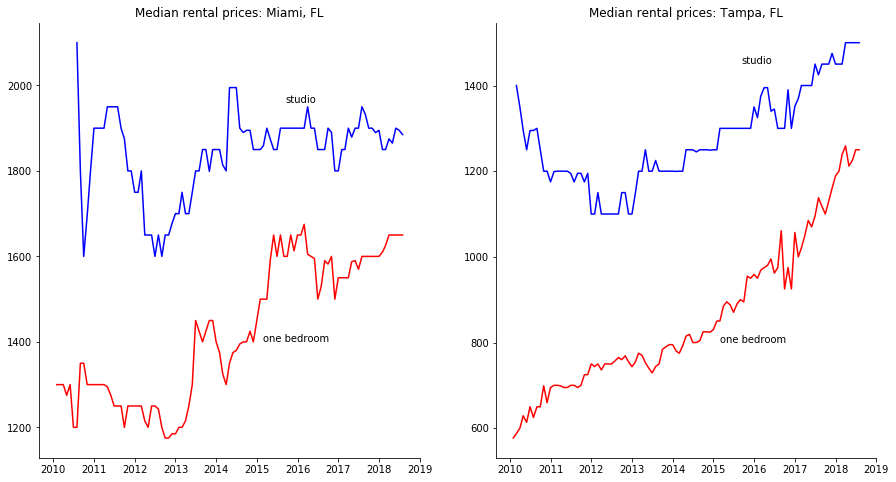

In [15]:

miami = rental_prices.loc['Miami, FL']
tampa = rental_prices.loc['Tampa, FL']

fig, ax = plt.subplots(1, 2, figsize=(15,8))

ax[0].plot(miami.index, miami['studio_price'], color='blue')
ax[0].plot(miami.index, miami['onebed_price'], color='red')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].set_title('Median rental prices: Miami, FL')
ax[0].text('03/01/2015', 1400, 'one bedroom')
ax[0].text('09/10/2015', 1960, 'studio')

ax[1].plot(tampa.index, tampa['studio_price'], color='blue')
ax[1].plot(tampa.index, tampa['onebed_price'], color='red')

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_title('Median rental prices: Tampa, FL')
ax[1].text('03/01/2015', 800, 'one bedroom')
ax[1].text('09/10/2015', 1450, 'studio')

plt.show()

Interesting...one bedroom apartments are cheaper than studios. Maybe this reflects studios being located in more desirable neighborhoods? 

Zillow spends a lot of effort trying to predict housing prices. This kind of data is one of the basic inputs into that process. 

## Practice
Head over to [MovieLens](https://grouplens.org/datasets/movielens/) and download the ml-latest-small dataset. It will come as a zipped file. Put it in your user drive (and cwd) and unzip it. You will find 5 files. 


Each user ranks *movies* and can *tag* movies. Users have a `userId` and movies have a `movieId`.
* 'movies.csv' holds the description of movies. An observation is a movie.
* 'ratings.csv' holds user ratings of movies. An observation is a user-movie 
* 'tags.csv' holds the tags a user assigns to a movie. A observation is a user-movie. A user can add more than one tag per movie.


1. Load the 'movies.csv' and the 'ratings.csv' files as DataFrames
2. What size are the two DataFrames?


In [16]:
movies = pd.read_csv('ml-latest-small/movies.csv')
print(movies.head())
print(movies.shape)

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
(9742, 3)


In [17]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
print(ratings.head())
print(ratings.shape)

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
(100836, 4)


In [18]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

3. Merge the two files on the movieId. What kind of join should you use? We have several ratings per movie. Call your merged DataFrame 'movie_data'.
4. What size is the resulting DataFrame?

In [19]:
# Each movie shows up several times in the ratings file (each movie is reviewed by many raters)
# We use a left join to keep all the observations in the ratings file (an inner would work as well)

movie_data = pd.merge(left=ratings, right=movies, on='movieId', how='left')
print(movie_data.head())
print(movie_data.shape)

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  
(100836, 6)


5. Create a histogram of the ratings. Use 10 bins. Use the density=True parameter to plot the density rather than the counts.

The histogram syntax works just like our regular plot command

```python
ax.hist(movie_data['rating'], bins=10, color = 'blue', alpha = 0.25, density=True)
```

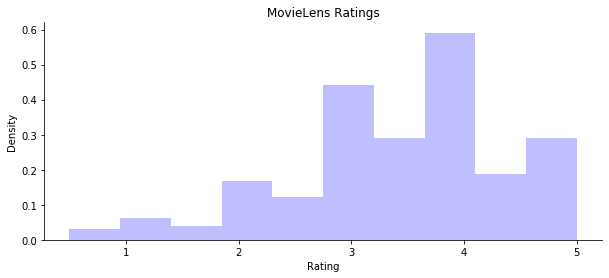

In [20]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(movie_data['rating'], bins=10, color = 'blue', alpha = 0.25, density=True)

ax.set_title('MovieLens Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

6. Load the 'tags.csv' file
7. Merge it into your 'movie_data' DataFrame. What keys should you use? What type of join? Name this DataFrame `movie_data_2`.

In [21]:
tags = pd.read_csv('ml-latest-small/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [22]:
movie_data_2 = pd.merge(left=movie_data, right=tags, on=['userId', 'movieId'], how='left')
movie_data_2[movie_data_2['userId']==2]

,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y
232,2,318,3.0,1445714835,"Shawshank Redemption, The (1994)",Crime|Drama,NaN,NaN
233,2,333,4.0,1445715029,Tommy Boy (1995),Comedy,NaN,NaN
234,2,1704,4.5,1445715228,Good Will Hunting (1997),Drama|Romance,NaN,NaN
235,2,3578,4.0,1445714885,Gladiator (2000),Action|Adventure|Drama,NaN,NaN
236,2,6874,4.0,1445714952,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller,NaN,NaN
237,2,8798,3.5,1445714960,Collateral (2004),Action|Crime|Drama|Thriller,NaN,NaN
238,2,46970,4.0,1445715013,Talladega Nights: The Ballad of Ricky Bobby (2...,Action|Comedy,NaN,NaN
239,2,48516,4.0,1445715064,"Departed, The (2006)",Crime|Drama|Thriller,NaN,NaN
240,2,58559,4.5,1445715141,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,NaN,NaN
241,2,60756,5.0,1445714980,Step Brothers (2008),Comedy,funny,1.445715e+09


Let's get a look at the kinds of tags we have. Try the code below, which introduces us to the `value_counts()` method of DataFrame. It counts the number of occurrences of each unique value. 

In [23]:
print(movie_data_2['tag'].value_counts())

In Netflix queue                   55
atmospheric                        36
surreal                            23
funny                              23
Disney                             23
                                   ..
aging                               1
geeky                               1
Oscar (Best Supporting Actress)     1
Crude humor                         1
Norman Bates                        1
Name: tag, Length: 1543, dtype: int64


I don't know what atmospheric means, so let's look at the tag, 'Disney'.
8. Compute the average rating for all movies and for movies tagged 'Disney'


In [24]:
dis = movie_data_2[movie_data_2['tag']=='Disney']
dis_mean = dis['rating'].mean()

all_mean = movie_data_2['rating'].mean()

print('The Disney mean rating is {0:.3} and the all movie rating is {1:.3}'.format(dis_mean, all_mean))

The Disney mean rating is 3.54 and the all movie rating is 3.51


9. Let's see how the ratings of Disney movies compare to all movies. We will plot two histograms on the same axes.
    1. Plot the histogram of movies tagged 'Disney'. Use 10 bins. Make the plot blue.
    2. Plot the histogram of all movies (like you did for question 5). Use 10 bins. make the plot red.
    3. Add a legend
    4. Add the mean ratings for all movies and for superhero movies as text to the histogram

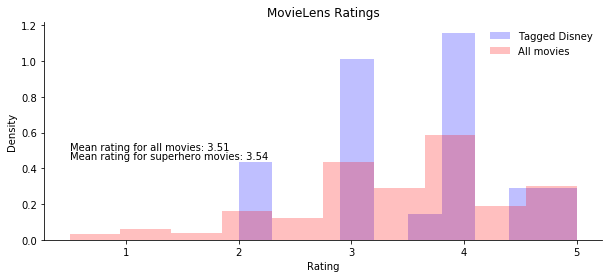

In [25]:


fig, ax = plt.subplots(figsize=(10,4))

# Two histograms one-atop the other
ax.hist(dis['rating'], bins=10, color = 'blue', alpha = 0.25, density=True, label = 'Tagged Disney')
ax.hist(movie_data_2['rating'], bins=10, color = 'red', alpha = 0.25, density=True, label = 'All movies')

ax.set_title('MovieLens Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text( 0.5, 0.5, 'Mean rating for all movies: {0:.3}'.format(all_mean))
ax.text( 0.5, 0.45, 'Mean rating for superhero movies: {0:.3}'.format(dis_mean))

ax.legend(frameon=False)
plt.show()